Unduh File Dataset:
https://drive.google.com/file/d/17w4TfYvJiYPfXxw6hlJda9DFmgNADJFF/view?usp=sharing atau akses melalui shortlink https://tinyurl.com/assessmentrsa

In [1]:
library(lubridate)
library(dplyr)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dataset <- read.csv("Assessment R_ Dataset_superstore_simple.csv")

In [3]:
# 1. Carilah customer_id yang memiliki sales paling besar

question1<-dataset%>%group_by(customer_id)%>%summarise(total_sales=sum(sales))
question1[order(-question1$total_sales),]%>%head(1)

customer_id,total_sales
<chr>,<dbl>
AB-10105,14473.57


In [4]:
# 2. Sub-category apa saja yang ada di dalam category 'Office Supplies', 
#    dan masing-masing berapa banyak total profitnya?
  
dataset%>%group_by(sub_category)%>%summarise(total_profit=sum(profit))

sub_category,total_profit
<chr>,<dbl>
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,31537.8937
Envelopes,6964.1767
Fasteners,949.5182


In [5]:
# 3. Berapa banyak order yang menghasilkan profit negatif (rugi)?
  
filter(dataset,profit<0)%>%select(c(order_id,profit))%>%
  summarise(total_loss_order=n())

total_loss_order
<int>
1869


In [6]:
# 4. Antara 3 customer_id ini, mana yang total sales-nya paling banyak: JE-16165, KH-16510, AD-10180?
  
question4<-filter(dataset,customer_id =='JE-16165'| customer_id =='KH-16510'|
         customer_id=='AD-10180')%>%group_by(customer_id)%>%
  summarise(total_sales=sum(sales))
question4[order(-question4$total_sales),]

customer_id,total_sales
<chr>,<dbl>
AD-10180,6106.880
KH-16510,5952.859
JE-16165,2697.248


In [7]:
# 5. Buatlah data frame bernama 'yearly_sales' yang berisi total sales, jumlah customers, 
#    dan total profit tiap tahun. Tahun berapa profit tertinggi diperoleh?
  
yearly_sales <- dataset%>%group_by(Year = year(order_date))%>%
  summarise(total_sales=sum(sales), 
            total_profit=sum(profit),
            n_distinct(customer_id))
yearly_sales[order(-yearly_sales$total_profit),] 

Year,total_sales,total_profit,n_distinct(customer_id)
<dbl>,<dbl>,<dbl>,<int>
2016,587205.7,79995.18,638
2017,697515.4,77759.31,693
2015,470532.5,61618.60,573
2014,461609.0,51355.05,595


Warning message:
“Removed 6 rows containing missing values (geom_point).”


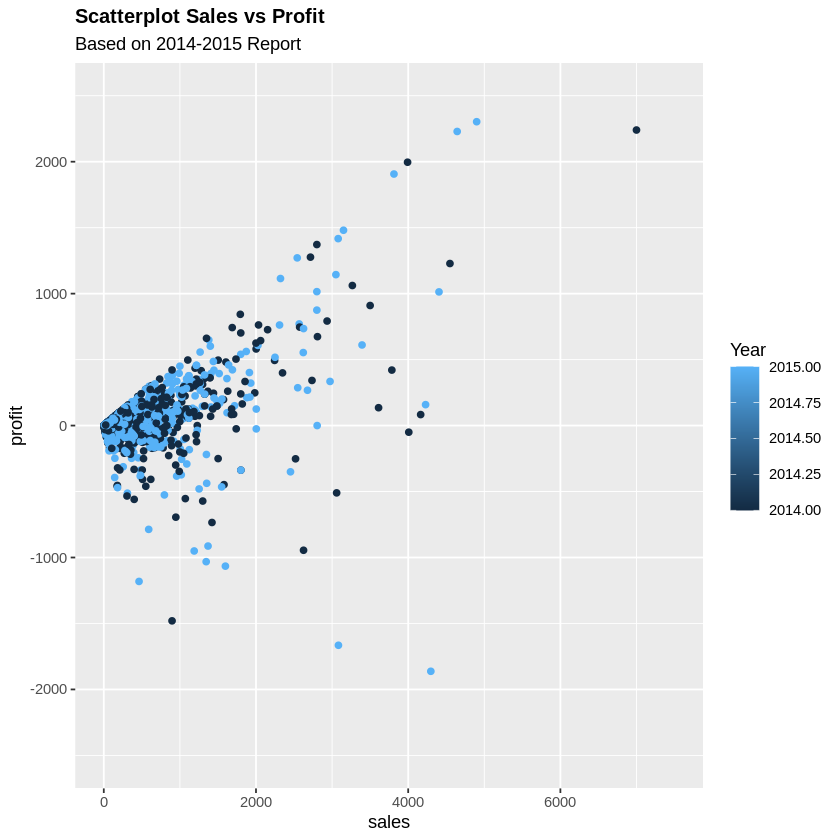

In [8]:
# 6. Buatlah scatterplot antara sales dan profit untuk data di tahun 2014-2015 saja, 
#    bedakan warnanya antara tahun 2014 dan tahun 2015. Beri judul 'Sales vs Profit 2014-2015'!"
  
financial_report <- dataset%>%group_by(Year = year(order_date))%>%
  filter(Year == 2014 | Year == 2015)
ggplot(financial_report,aes(x=sales,y=profit)) + 
  geom_point(aes(col= Year))+ 
    labs(title='Scatterplot Sales vs Profit',
       subtitle = 'Based on 2014-2015 Report')+
  xlim(c(0,7500))+ylim(c(-2500,2500))+
  theme(plot.title = element_text(size = 12, face='bold'))

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.



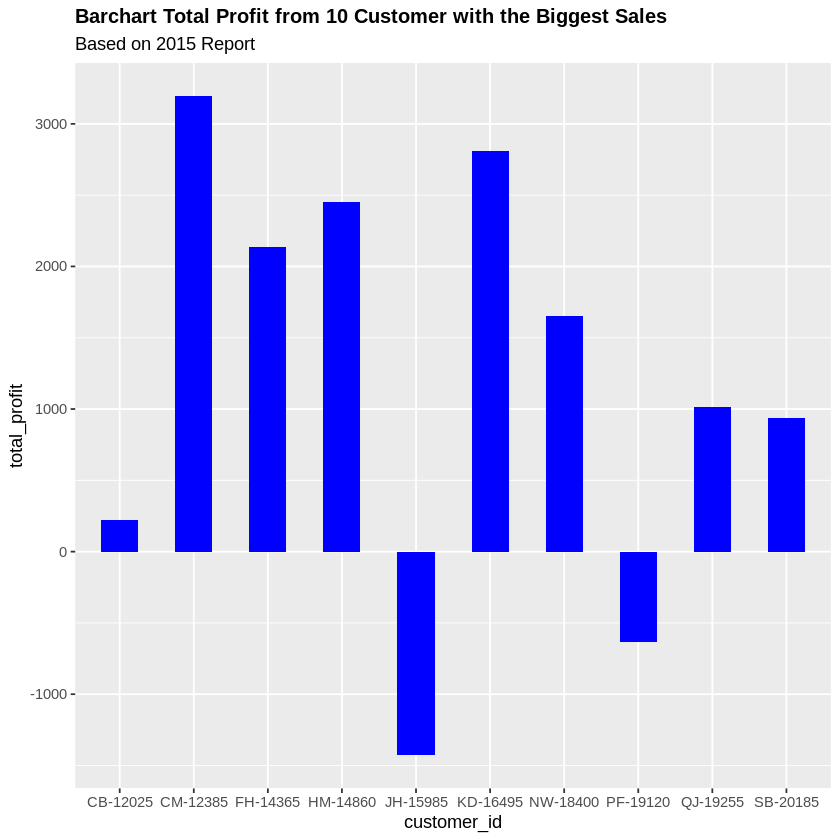

In [9]:
# 7. Buatlah barchart yang berisi total profit dari 10 customer dengan total sales tertinggi di tahun 2015!
  
last_question<- dataset%>%group_by(Year = year(order_date),customer_id)%>%
  filter(Year== 2015)%>%summarise(total_sales=sum(sales),total_profit=sum(profit))
final<- last_question[order(-last_question$total_sales),]%>%head(10)
ggplot(final,aes(x=customer_id, y=total_profit,))+
  geom_bar(stat = 'identity', width = 0.5, fill='blue')+
  labs(title = 'Barchart Total Profit from 10 Customer with the Biggest Sales',
       subtitle = 'Based on 2015 Report')+
  theme(plot.title = element_text(size = 12, face='bold'))